<a href="https://colab.research.google.com/github/LeoRyu18/AM2_T1/blob/main/AM2_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1º Trabalho de Aprendizado de Máquina II - UFSCar 2020/2

---

**Trabalho referente a aplicação de métodos de Classificação multirrótulo em múltiplos datasets.**

**Professor**
> Diego Furtado Silva

**Participantes:**

>Leonardo Ryu Takaki -> lrtakaki@estudante.ufscar.br

>Augusto Rozendo Mends -> augustorm@estudante.ufscar.br

>Fernando Sassi Nunes -> fernando.nunes@estudante.ufscar.br

---

- Algoritmos
 - MLkNN
 - Relevância binária (BR)
 - Label Powerset (LP)




- Base de dados
 - Emotions
 - FoodTrucks
 - Birds
 - Scene
 -

---

In [42]:
!pip install scikit-multilearn

In [74]:
# importações

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


import sklearn.metrics as metrics
from skmultilearn.adapt import MLkNN
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from pandas_profiling import ProfileReport

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import FitFailedWarning
simplefilter(action='ignore', category=FitFailedWarning)

---
## MLkNN

* Derivado de dois algoritmos monorrótulos: KNN e Naive Bayes;

* 1) KNN é aplicado, identificando os k vizinhos mais próximos do novo objeto na base de treinamento.

* 2) A Fórmula de Bayes é empregada para cada rótulo de classe lj presente no labelset destes k vizinhos para estimar se t deverá ou não ser rotulado com lj.



In [44]:
def MLkNN_simples(X_train, y_train, X_test, y_test):
    classifier = MLkNN(k=3)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print("Hamming Loss =", metrics.hamming_loss(y_test, predictions))
    print("Acurácia =", metrics.accuracy_score(y_test, predictions))
    print("Precisão =", metrics.precision_score(y_test, predictions, average='micro'))
    print("Revocação =", metrics.recall_score(y_test, predictions, average='micro'))

def MLkNN_GS(X_train, y_train, X_test, y_test):
    parameters = {'k': range(1,10), 's': [0.1, 0.3, 0.5, 0.7, 1.0]}

    model = GridSearchCV(MLkNN(), parameters, scoring='accuracy')
    model.fit(X_train, y_train)
    print("Melhores parâmetros =", model.best_params_,"\nMelhor score =", model.best_score_)

    predictions = model.predict(X_test)
    
    Hamming_Loss = metrics.hamming_loss(y_test, predictions)
    Acuracia = metrics.accuracy_score(y_test, predictions)
    Precisão = metrics.precision_score(y_test, predictions, average='micro')
    Revocação = metrics.recall_score(y_test, predictions, average='micro')

    print("Hamming Loss =", Hamming_Loss)
    print("Acurácia =", Acuracia)
    print("Precisão =", Precisão)
    print("Revocação =", Revocação)
    return Hamming_Loss, Acuracia, Precisão, Revocação

---
## Relevância binária (BR)

* Um classificador binário de rótulo único é treinado para cada classe.

* Cada classificador prevê a associação ou a não associação de uma classe para um objeto. A união de todas as classes previstas será a saída.

* Considera independência entre os rótulos.



In [45]:
def BR_simples(X_train, y_train, X_test, y_test):
    classifier = BinaryRelevance( classifier = SVC(), require_dense = [False, True])
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print("Hamming Loss =", metrics.hamming_loss(y_test, predictions))
    print("Acurácia =", metrics.accuracy_score(y_test, predictions))
    print("Precisão =", metrics.precision_score(y_test, predictions, average='micro'))
    print("Revocação =", metrics.recall_score(y_test, predictions, average='micro'))

def BR_GS(X_train, y_train, X_test, y_test):
    parameters = [{'classifier': [MultinomialNB()],
                   'classifier__alpha': [0.5, 0.7, 1.0],
                  },
                  {'classifier': [SVC()],
                   'classifier__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                  },
                  {'classifier':[GaussianNB()],
                   'classifier__var_smoothing':[0.00000001, 0.000000001, 0.00000001],
                  },
                  {'classifier': [RandomForestClassifier()],
                   'classifier__criterion': ['gini', 'entropy'],
                   'classifier__n_estimators': [10, 20, 50],
                  },
                 ]
    model = GridSearchCV(BinaryRelevance(), parameters, scoring='accuracy')
    model.fit(X_train, y_train)
    print("Melhores parâmetros =", model.best_params_,"\nMelhor score =", model.best_score_)

    predictions = model.predict(X_test)
    Hamming_Loss = metrics.hamming_loss(y_test, predictions)
    Acuracia = metrics.accuracy_score(y_test, predictions)
    Precisão = metrics.precision_score(y_test, predictions, average='micro')
    Revocação = metrics.recall_score(y_test, predictions, average='micro')

    print("Hamming Loss =", Hamming_Loss)
    print("Acurácia =", Acuracia)
    print("Precisão =", Precisão)
    print("Revocação =", Revocação)
    return Hamming_Loss, Acuracia, Precisão, Revocação

---
## LP (Label Powerset)

* Essa abordagem leva em consideração as possíveis correlações entre os rótulos de classe.

* Considera cada combinação das classes como um único rótulo.

* Tem uma alta complexidade computacional, tendo em vista que as combinações distintas de rótulos cresce exponencialmente quando o número de classes aumenta, tornando o problema difícil.



In [46]:
def LP_simples(X_train, y_train, X_test, y_test):
    classifier = ClassifierChain(classifier = RandomForestClassifier(n_estimators=100), require_dense = [False, True])
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print("Hamming Loss =", metrics.hamming_loss(y_test, predictions))
    print("Acurácia =", metrics.accuracy_score(y_test, predictions))
    print("Precisão =", metrics.precision_score(y_test, predictions, average='micro'))
    print("Revocação =", metrics.recall_score(y_test, predictions, average='micro'))


def LP_GS(X_train, y_train, X_test, y_test):
    parameters = [{'classifier': [MultinomialNB()],
                   'classifier__alpha': [0.5, 0.7, 1.0],
                  },
                  {'classifier': [RandomForestClassifier()],
                   'classifier__criterion': ['gini', 'entropy'],
                   'classifier__n_estimators': [10, 20, 50],
                  },
                  {'classifier': [SVC()],
                   'classifier__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                  },
                  {'classifier':[GaussianNB()],
                   'classifier__var_smoothing':[0.00000001, 0.000000001, 0.00000001],
                  },
                 ]
    model = GridSearchCV(LabelPowerset(), parameters, scoring='accuracy')
    model.fit(X_train, y_train)
    print("Melhores parâmetros =", model.best_params_,"\nMelhor score =", model.best_score_)

    predictions = model.predict(X_test)
    Hamming_Loss = metrics.hamming_loss(y_test, predictions)
    Acuracia = metrics.accuracy_score(y_test, predictions)
    Precisão = metrics.precision_score(y_test, predictions, average='micro')
    Revocação = metrics.recall_score(y_test, predictions, average='micro')

    print("Hamming Loss =", Hamming_Loss)
    print("Acurácia =", Acuracia)
    print("Precisão =", Precisão)
    print("Revocação =", Revocação)
    return Hamming_Loss, Acuracia, Precisão, Revocação


---

# Datasets + aplicação dos algoritmos

## Emotions

Dataset obtido em http://mulan.sourceforge.net/datasets-mlc.html

Os humanos, por natureza, são afetados emocionalmente pela música. À medida que os bancos de dados de música aumentam de tamanho, a recuperação da música pela emoção se torna uma
tarefa importante para várias aplicações, como seleção de música em dispositivos móveis, sistemas de recomendação de música, programas de TV, rádio e musicoterapia.
A música pode evocar mais de uma emoção diferente ao mesmo tempo. Desta forma, queremos recuperar uma peça musical baseada em qualquer uma das emoções. A classificação e regressão de rótulo único não podem modelar essa multiplicidade, portanto, utilizamos alguns algoritmos de classificação multirrótulo.

Os features extraídos se enquadram em duas categorias: rítmica e timbre.

* Features Rítmicos:
As características rítmicas foram derivadas da extração das alterações periódicas de um histograma de batida. Um algoritmo que identifica picos foi utilizado e os dois picos mais altos foram selecionados para calcular as amplitudes,
seus BPMs (batidas por minuto) e a proporção de alta BPM e baixa BPM. Além disso, 3 recursos foram calculados somando os bins do histograma entre 40-90, 90-140 e 140-
250 BPMs respectivamente. Desta forma, temos 
8 features rítmicos.

* Features de timbre:
Coeficientes mel-cepstrais (MFCCs) são usados ​​para
reconhecimento de fala e modelagem musical. Para derivar features MFCCs, o sinal foi dividido em frames e o espectro de amplitude foi calculado para cada frame. Em seguida, seu logaritmo foi obtido e convertido para a escala de Mel. Finalmente, a
transformada discreta de cosseno foi aplicada. No Dataset selecionado, foram utilizados os primeiros 13 MFCCs.
Outro conjunto de 3 features relacionados a texturas de timbre foram extraídos da Transformada de Fourier de Curto Termo (FFT): Centróide espectral, rolloff espectral e fluxo espectral.
Para cada um dos 16 recursos mencionados acima (13 MFCCs e 3 FFT) foram calculadas a média, o desvio padrão (std),
desvio padrão médio (mean std) e desvio padrão
de desvio padrão (std std) em todos os frames. Isso levou a um total de 64 recursos de timbre.

Temos 6 classes: amazed-surprised, happy-pleased, relaxing-calm, quiet-still, sad-lonely, angry-fearful. Os exemplos foram classificados por três especialistas do sexo masculino de 20, 25 e 30 anos. Apenas as músicas com rotulagem completamente idêntica entre os especialistas foram mantidas para experimentação subsequente. Esse processo levou a um conjunto de dados com 593 músicas classificados.

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/LeoRyu18/AM2_T1/main/emotions.csv?token=AHW73BL6QJI2YHTKQFMQHTDAKVXNU")
df.head()

,id,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,Mean_Acc1298_Mean_Mem40_MFCC_7,Mean_Acc1298_Mean_Mem40_MFCC_8,Mean_Acc1298_Mean_Mem40_MFCC_9,Mean_Acc1298_Mean_Mem40_MFCC_10,Mean_Acc1298_Mean_Mem40_MFCC_11,Mean_Acc1298_Mean_Mem40_MFCC_12,Mean_Acc1298_Std_Mem40_Centroid,Mean_Acc1298_Std_Mem40_Rolloff,Mean_Acc1298_Std_Mem40_Flux,Mean_Acc1298_Std_Mem40_MFCC_0,Mean_Acc1298_Std_Mem40_MFCC_1,Mean_Acc1298_Std_Mem40_MFCC_2,Mean_Acc1298_Std_Mem40_MFCC_3,Mean_Acc1298_Std_Mem40_MFCC_4,Mean_Acc1298_Std_Mem40_MFCC_5,Mean_Acc1298_Std_Mem40_MFCC_6,Mean_Acc1298_Std_Mem40_MFCC_7,Mean_Acc1298_Std_Mem40_MFCC_8,Mean_Acc1298_Std_Mem40_MFCC_9,Mean_Acc1298_Std_Mem40_MFCC_10,Mean_Acc1298_Std_Mem40_MFCC_11,Mean_Acc1298_Std_Mem40_MFCC_12,Std_Acc1298_Mean_Mem40_Centroid,Std_Acc1298_Mean_Mem40_Rolloff,Std_Acc1298_Mean_Mem40_Flux,Std_Acc1298_Mean_Mem40_MFCC_0,Std_Acc1298_Mean_Mem40_MFCC_1,Std_Acc1298_Mean_Mem40_MFCC_2,Std_Acc1298_Mean_Mem40_MFCC_3,Std_Acc1298_Mean_Mem40_MFCC_4,Std_Acc1298_Mean_Mem40_MFCC_5,Std_Acc1298_Mean_Mem40_MFCC_6,Std_Acc1298_Mean_Mem40_MFCC_7,Std_Acc1298_Mean_Mem40_MFCC_8,Std_Acc1298_Mean_Mem40_MFCC_9,Std_Acc1298_Mean_Mem40_MFCC_10,Std_Acc1298_Mean_Mem40_MFCC_11,Std_Acc1298_Mean_Mem40_MFCC_12,Std_Acc1298_Std_Mem40_Centroid,Std_Acc1298_Std_Mem40_Rolloff,Std_Acc1298_Std_Mem40_Flux,Std_Acc1298_Std_Mem40_MFCC_0,Std_Acc1298_Std_Mem40_MFCC_1,Std_Acc1298_Std_Mem40_MFCC_2,Std_Acc1298_Std_Mem40_MFCC_3,Std_Acc1298_Std_Mem40_MFCC_4,Std_Acc1298_Std_Mem40_MFCC_5,Std_Acc1298_Std_Mem40_MFCC_6,Std_Acc1298_Std_Mem40_MFCC_7,Std_Acc1298_Std_Mem40_MFCC_8,Std_Acc1298_Std_Mem40_MFCC_9,Std_Acc1298_Std_Mem40_MFCC_10,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,1,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,0.672063,0.783788,0.766640,0.458712,0.530384,0.812429,0.028851,0.129039,0.039614,5.762173,1.636819,1.170034,1.051511,0.764163,0.642705,0.617868,0.510265,0.566213,0.509149,0.477275,0.505073,0.463535,0.013519,0.050591,0.009025,8.156257,1.077167,0.624711,0.810244,0.399568,0.279947,0.314215,0.231439,0.345401,0.285389,0.210613,0.321896,0.290551,0.022774,0.095801,0.015057,4.748694,0.536378,0.296306,0.273210,0.175800,0.105508,0.168246,0.115849,0.136020,0.110514,0.100517,0.118630,0.094923,0.051035,68,0.014937,136,2,0.245457,0.105065,0.405399,0,1,1,0,0,0
1,2,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,0.308287,0.538152,0.594871,0.734332,0.415489,0.761508,0.066288,0.262370,0.034438,3.480874,1.596532,0.943803,0.804444,0.511229,0.498670,0.523039,0.480916,0.488657,0.483166,0.445187,0.415994,0.405593,0.013621,0.073041,0.010094,1.243981,0.829790,0.252972,0.347831,0.205087,0.168601,0.178009,0.144080,0.178703,0.146937,0.125580,0.128202,0.107007,0.020028,0.066940,0.029483,3.963534,0.382360,0.168389,0.117525,0.098341,0.087046,0.057991,0.059393,0.059457,0.053439,0.067684,0.070075,0.041565,0.295031,70,0.276366,140,2,0.343547,0.276366,0.710924,1,0,0,0,0,1
2,3,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,0.469322,0.644336,0.441556,0.335964,0.290713,0.158538,0.082743,0.215373,0.035970,4.834742,1.213443,0.864034,0.909222,0.780572,0.550833,0.639740,0.573309,0.526312,0.562622,0.538407,0.492292,0.455562,0.029112,0.070433,0.008525,2.759906,0.592634,0.761852,0.568740,0.589827,0.281181,0.437752,0.479889,0.227320,0.296224,0.273855,0.191804,0.198025,0.038119,0.065427,0.029622,3.371796,0.430373,0.172862,0.177523,0.184333,0.095718,0.139323,0.109279,0.090650,0.117886,0.100852,0.079917,0.085821,0.1

In [48]:
# Pré-processamento 

df = df.drop(columns=['id'])

class_pos = ["amazed-suprised", "happy-pleased", "relaxing-calm", "quiet-still", "sad-lonely", "angry-aggresive"]
X_train, X_test, y_train, y_test = train_test_split(df.drop(class_pos, axis = 1), df[class_pos],  test_size = 0.3, random_state = 1)

# Normalização
X_train = preprocessing.MinMaxScaler().fit_transform(X_train)
X_test = preprocessing.MinMaxScaler().fit_transform(X_test)
y_train = y_train.values
y_test = y_test.values

In [49]:
# MLkNN
print("MLkNN simples:")
MLkNN_simples(X_train, y_train, X_test, y_test)

print("\nMLkNN com Grid Search:")

MLkNN_Hamming_Loss_Emotions , MLkNN_Acuracia_Emotions, MLkNN_Precisão_Emotions , MLkNN_Revocação_Emotions = MLkNN_GS(X_train, y_train, X_test, y_test)

MLkNN simples:
Hamming Loss = 0.2144194756554307
Acurácia = 0.29213483146067415
Precisão = 0.6778115501519757
Revocação = 0.6445086705202312

MLkNN com Grid Search:
Melhores parâmetros = {'k': 3, 's': 0.1} 
Melhor score = 0.28674698795180725
Hamming Loss = 0.2144194756554307
Acurácia = 0.29213483146067415
Precisão = 0.6778115501519757
Revocação = 0.6445086705202312


In [50]:
MLkNN_Hamming_Loss_Emotions

0.2144194756554307

In [51]:
# BR
print("BR simples:")
BR_simples(X_train, y_train, X_test, y_test)

print("\nBR com Grid Search:")
BR_Hamming_Loss_Emotions , BR_Acuracia_Emotions, BR_Precisão_Emotions , BR_Revocação_Emotions = BR_GS(X_train, y_train, X_test, y_test)

BR simples:
Hamming Loss = 0.18726591760299627
Acurácia = 0.2640449438202247
Precisão = 0.8173913043478261
Revocação = 0.5433526011560693

BR com Grid Search:
Melhores parâmetros = {'classifier': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'classifier__kernel': 'rbf'} 
Melhor score = 0.30120481927710846
Hamming Loss = 0.18726591760299627
Acurácia = 0.2640449438202247
Precisão = 0.8173913043478261
Revocação = 0.5433526011560693


In [52]:
# LP
print("LP simples:")
LP_simples(X_train, y_train, X_test, y_test)

print("\nLP com Grid Search:")
LP_Hamming_Loss_Emotions , LP_Acuracia_Emotions, LP_Precisão_Emotions , LP_Revocação_Emotions =LP_GS(X_train, y_train, X_test, y_test)

LP simples:
Hamming Loss = 0.18726591760299627
Acurácia = 0.30337078651685395
Precisão = 0.7786259541984732
Revocação = 0.5895953757225434

LP com Grid Search:
Melhores parâmetros = {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__criterion': 'entropy', 'classifier__n_estimators': 50} 
Melhor score = 0.3253012048192771
Hamming Loss = 0.20786516853932585
Acurácia = 0.34831460674157305
Precisão = 0.6823529411764706
Revocação = 0.6705202312138728



---
## FoodTrucks

Este dataset (disponível em https://www.uco.es/kdis/mllresources/) contém resultados de uma pesquisa conduzida em Natal, que visava determinar preferência por certos tipos de food trucks dependendo de fatores diversos. São 407 exemplos no total.

As features são:

* frequência(numérico): com que frequência uma pessoa come fora, de 1(raramente) a 5(diariamente ou quase diariamente)

* tempo (categórico): em que parte do dia costuma comer fora. Os possíveis valores são: manhã,almoço, tarde, happy hour e janta

* gasto (numérico): quanto um dado indivíduo costuma gastar, em reais. Os valores determinam os limites dos intervalos: 15,20,30,40,50.

* motivação (categórico): o que leva um indivíduo a escolher determinado foodtruck: propaganda, acaso, amigos, redes sociais, internet

* gosto, higiene, menu, apresentação, atendimento, ingredientes, lugar disponível,para viagem, variação de escolha, encontros, horários: quanto um dado indivíduo valoriza determinadas qualidades de um foodtruck, numa escala de 1 a 5.

* gênero(categórico)

* escolaridade(numérico): de sem estudo a phd numa escala de 1 a 5. Vale notar que alunos em processo de graduação são representados por 1.5

* renda média(numérico): em termos de salários mínimos, de 1 a 5, sendo 1 menos de 2 e 5 mais de 20

* trabalha (binário)

* estado civil (categórico)

* idade (numérico): agrupados em intervalos, sendo o primeiro <19, os subsequentes de 5 em 5, terminando em um intervalo 50+. Assume os valores de 1 a 8.

In [53]:
df_food = pd.read_csv("https://raw.githubusercontent.com/LeoRyu18/AM2_T1/main/food.csv?token=AHW73BLI3WHUSEIWBNJPWKLAKVW3K")
df_food.head()
df_food_test = df_food.drop(['motivation', 'expenses', 'taste', 'variation', 'ingredients'], axis = 1)

In [54]:
labels = ['italian_food','brazilian_food','mexican_food','chinese_food','japanese_food','arabic_food','snacks','healthy_food','fitness_food','sweets_desserts','gourmet','street_food']

y = df_food[labels]
X = df_food.drop(labels,axis=1)

In [55]:
#encoding de features categóricos
X.replace({'dawn':1,'lunch':2,'afternoon':3,'happy_hour':4,'dinner':5
,'ads':1,'by_chance':2,'friend':3,'social_network':4,'web':5,
'F':1,'M':2,
'divorced':1,'married':2,'single':3
}, inplace=True)


#Separação treino-teste
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42) 
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# o único feature que já não vem normalizado numa escala de 1 a 5 é a renda. Não sei se isso é um oversight ou intencional por parte do estudo mas eu decidi normalizar

X_train = preprocessing.MinMaxScaler().fit_transform(X_train)
X_test = preprocessing.MinMaxScaler().fit_transform(X_test)



In [56]:
print("BR simples:")
BR_simples(X_train, y_train, X_test, y_test)

print("\nBR com Grid Search:")
BR_Hamming_Loss_FoodTrucks , BR_Acuracia_FoodTrucks, BR_Precisão_FoodTrucks , BR_Revocação_FoodTrucks = BR_GS(X_train, y_train, X_test, y_test)

BR simples:
Hamming Loss = 0.16584967320261437
Acurácia = 0.24509803921568626
Precisão = 0.6608695652173913
Revocação = 0.31666666666666665

BR com Grid Search:
Melhores parâmetros = {'classifier': MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True), 'classifier__alpha': 0.5} 
Melhor score = 0.28852459016393445
Hamming Loss = 0.16666666666666666
Acurácia = 0.2647058823529412
Precisão = 0.6764705882352942
Revocação = 0.2875


In [57]:
# MLkNN
print("MLkNN simples:")
MLkNN_simples(X_train, y_train, X_test, y_test)

print("\nMLkNN com Grid Search:")
MLkNN_Hamming_Loss_FoodTrucks , MLkNN_Acuracia_FoodTrucks, MLkNN_Precisão_FoodTrucks , MLkNN_Revocação_FoodTrucks = MLkNN_GS(X_train, y_train, X_test, y_test)

MLkNN simples:
Hamming Loss = 0.18137254901960784
Acurácia = 0.16666666666666666
Precisão = 0.5555555555555556
Revocação = 0.375

MLkNN com Grid Search:
Melhores parâmetros = {'k': 9, 's': 1.0} 
Melhor score = 0.2
Hamming Loss = 0.18382352941176472
Acurácia = 0.16666666666666666
Precisão = 0.5454545454545454
Revocação = 0.375


In [58]:
# LP
print("LP simples:")
LP_simples(X_train, y_train, X_test, y_test)

print("\nLP com Grid Search:")
LP_Hamming_Loss_FoodTrucks , LP_Acuracia_FoodTrucks, LP_Precisão_FoodTrucks , LP_Revocação_FoodTrucks = LP_GS(X_train, y_train, X_test, y_test)

LP simples:
Hamming Loss = 0.15849673202614378
Acurácia = 0.28431372549019607
Precisão = 0.6825396825396826
Revocação = 0.35833333333333334

LP com Grid Search:
Melhores parâmetros = {'classifier': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'classifier__kernel': 'rbf'} 
Melhor score = 0.2918032786885246
Hamming Loss = 0.16666666666666666
Acurácia = 0.2647058823529412
Precisão = 0.6764705882352942
Revocação = 0.2875


In [59]:
labels = ['italian_food','brazilian_food','mexican_food','chinese_food','japanese_food','arabic_food','snacks','healthy_food','fitness_food','sweets_desserts','gourmet','street_food']

y = df_food_test[labels]
X = df_food_test.drop(labels,axis=1)

#encoding de features categóricos
X.replace({'dawn':1,'lunch':2,'afternoon':3,'happy_hour':4,'dinner':5,
'F':1,'M':2,
'divorced':1,'married':2,'single':3
}, inplace=True)


#Separação treino-teste
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42) 
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# o único feature que já não vem normalizado numa escala de 1 a 5 é a renda. Não sei se isso é um oversight ou intencional por parte do estudo mas eu decidi normalizar

X_train = preprocessing.MinMaxScaler().fit_transform(X_train)
X_test = preprocessing.MinMaxScaler().fit_transform(X_test)


---
## Birds

 Esse dataset (disponivel em http://mulan.sourceforge.net/datasets-mlc.html) contem dados captados no H. J. Andrews (HJA) Long-Term Experimental Research Forest, na cordilheira das cascatas . Nesse local, há anos, são captados audios para analises de diversos fatores, e com eles, é possivel detectar o tipo de clima, composição vegetal e muitas outras coisas.

  Esse dataset em especifico foi feito para ser utilizado na nona competição MLSP anual e nele esta incluso chuva, vento e ate mesmo audios sem passaros. Ele possui 645 gravações de 10 segundos no formato WAV.

  Há 19 especies de passáros presentes sendo elas:

 * Brown Creeper
 * Pacific Wren
 * Pacific-slope Flycatcher
 * Red-breasted Nuthatch
 * Dark-eyed Junco
 * Olive-sided Flycatcher
 * Hermit Thrush
 * Chestnut-backed Chickadee
 * Varied Thrush
 * Hermit Warbler
 * Swainson’s Thrush
 * Hammond’s Flycatcher
 * Western Tanager
 * Black-headed Grosbeak
 * Golden Crowned Kinglet
 * Warbling Vireo
 * MacGillivray’s Warbler
 * Stellar’s Jay
 * Common Nighthawk


  Os audios foram marcados com a presença de um conjunto de passaros, detectados por uma equipe de especialistas após analisarem os audios e os espectrogramas.

  O dataset está dividido em teste e treino, 

  Por fim, esse dataset foi utilizado na competição, e seus resultados foram exibidos na 2013 IEEE INTERNATIONAL WORKSHOP ON MACHINE LEARNING FOR SIGNAL PROCESSING. Não tivemos acesso às soluções utilizadas na competição e nem utilizamos o relatorio que exibe as ideias utilizadas pelas vencedores, uma vez que esse trabalho tem a ver com a comparação dos metodos escolhidos por nós em 5 datasets diferentes

In [60]:
#Carregar o dataset de treino
df_birds_train = pd.read_csv("https://raw.githubusercontent.com/LeoRyu18/AM2_T1/main/csv_result-birds-train.csv")
df_birds_train = df_birds_train.drop('id', axis = 1)
df_birds_train.head()

,audio-ssd1,audio-ssd2,audio-ssd3,audio-ssd4,audio-ssd5,audio-ssd6,audio-ssd7,audio-ssd8,audio-ssd9,audio-ssd10,audio-ssd11,audio-ssd12,audio-ssd13,audio-ssd14,audio-ssd15,audio-ssd16,audio-ssd17,audio-ssd18,audio-ssd19,audio-ssd20,audio-ssd21,audio-ssd22,audio-ssd25,audio-ssd26,audio-ssd27,audio-ssd28,audio-ssd29,audio-ssd30,audio-ssd31,audio-ssd32,audio-ssd33,audio-ssd34,audio-ssd35,audio-ssd36,audio-ssd37,audio-ssd38,audio-ssd39,audio-ssd40,audio-ssd41,audio-ssd42,...,cluster89,cluster90,cluster91,cluster92,cluster93,cluster94,cluster95,cluster96,cluster97,cluster98,cluster99,cluster100,segments,mean_rect_width,std_rect_width,mean_rect_height,std_rect_height,mean_rect_volume,std_rect_volume,hasSegments,location,Brown,Pacific,Pacific-slope,Red-breasted,Dark-eyed,Olive-sided,Hermit,Chestnut-backed,Varied,Hermit.1,Swainson,Hammond,Western,Black-headed,Golden,Warbling,MacGillivray,Stellar,Common
0,0.016521,0.039926,0.089632,0.134119,0.170470,0.176872,0.171546,0.182392,0.162482,0.159083,0.164531,0.163366,0.171633,0.219787,0.270805,0.339206,0.327098,0.264581,0.173363,0.131426,0.068158,0.001216,0.000493,0.001114,0.003419,0.004479,0.004231,0.004013,0.003757,0.003314,0.003246,0.002308,0.002129,0.001777,0.002338,0.002030,0.003741,0.005809,0.006852,0.004594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,16.384615,20.617394,46.769231,71.863118,788.923077,1761.802180,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0.006600,0.035984,0.089956,0.123214,0.172273,0.177068,0.165507,0.179655,0.161744,0.163678,0.161606,0.159523,0.171042,0.217206,0.254929,0.307129,0.293592,0.242930,0.151817,0.105817,0.062566,0.001245,0.000118,0.000972,0.003037,0.004070,0.004311,0.004704,0.003967,0.003847,0.002940,0.002346,0.002030,0.001950,0.002063,0.002207,0.002420,0.002521,0.001875,0.001428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.006894,0.017722,0.048062,0.065802,0.103443,0.091397,0.084931,0.088666,0.075676,0.074408,0.074683,0.083202,0.088820,0.125175,0.165580,0.212101,0.217109,0.153888,0.099709,0.074910,0.045928,0.001095,0.000125,0.000368,0.001433,0.002134,0.002286,0.001869,0.001417,0.001420,0.001047,0.000855,0.000764,0.000865,0.000837,0.001438,0.002761,0.005301,0.005453,0.000806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,24.000000,2.828427,28.000000,1.414214,674.000000,113.137085,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.031046,0.127675,0.221428,0.272707,0.358743,0.349389,0.316029,0.330656,0.310752,0.306288,0.300054,0.304569,0.295422,0.367728,0.398225,0.457381,0.429034,0.330248,0.213530,0.131256,0.075369,0.001508,0.000894,0.005276,0.008511,0.010244,0.010371,0.009083,0.008407,0.006876,0.006512,0.005826,0.004873,0.004481,0.004114,0.004384,0.004423,0.004448,0.002896,0.002198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.064721,0.226644,0.304482,0.274662,0.346980,0.334063,0.307223,0.324666,0.297070,0.292258,0.287987,0.289535,0.286109,0.354479,0.389812,0.444778,0.407931,0.312861,0.197836,0.122053,0.069657,0.001287,0.002601,0.015984,0.014081,0.008860,0.009464,0.008694,0.007648,0.007977,0.006727,0.005021,0.004376,0.004248,0.004151,0.004636,0.004249,0.004037,0.002778,0.001979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
#Carregar o dataset de teste
df_birds_test = pd.read_csv("https://raw.githubusercontent.com/LeoRyu18/AM2_T1/main/csv_result-birds-test.csv")
df_birds_test = df_birds_test.drop('id', axis = 1)
df_birds_test.head()

,audio-ssd1,audio-ssd2,audio-ssd3,audio-ssd4,audio-ssd5,audio-ssd6,audio-ssd7,audio-ssd8,audio-ssd9,audio-ssd10,audio-ssd11,audio-ssd12,audio-ssd13,audio-ssd14,audio-ssd15,audio-ssd16,audio-ssd17,audio-ssd18,audio-ssd19,audio-ssd20,audio-ssd21,audio-ssd22,audio-ssd25,audio-ssd26,audio-ssd27,audio-ssd28,audio-ssd29,audio-ssd30,audio-ssd31,audio-ssd32,audio-ssd33,audio-ssd34,audio-ssd35,audio-ssd36,audio-ssd37,audio-ssd38,audio-ssd39,audio-ssd40,audio-ssd41,audio-ssd42,...,cluster89,cluster90,cluster91,cluster92,cluster93,cluster94,cluster95,cluster96,cluster97,cluster98,cluster99,cluster100,segments,mean_rect_width,std_rect_width,mean_rect_height,std_rect_height,mean_rect_volume,std_rect_volume,hasSegments,location,Brown,Pacific,Pacific-slope,Red-breasted,Dark-eyed,Olive-sided,Hermit,Chestnut-backed,Varied,Hermit.1,Swainson,Hammond,Western,Black-headed,Golden,Warbling,MacGillivray,Stellar,Common
0,0.132445,0.143931,0.227729,0.298556,0.385907,0.378363,0.354708,0.384165,0.360092,0.347465,0.341827,0.349941,0.349431,0.425508,0.470748,0.545955,0.515480,0.439492,0.287173,0.134652,0.082536,0.001778,0.009794,0.006053,0.008890,0.011114,0.010665,0.010292,0.008779,0.008474,0.008938,0.006323,0.006312,0.005450,0.005856,0.004785,0.005768,0.005577,0.004093,0.002956,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.101617,0.130342,0.228117,0.281017,0.365804,0.370122,0.359235,0.388608,0.362013,0.348229,0.342542,0.345851,0.338571,0.424733,0.470891,0.547948,0.516554,0.445265,0.293809,0.140007,0.088689,0.001953,0.005568,0.006061,0.008843,0.009781,0.009482,0.010100,0.011016,0.009763,0.007648,0.006345,0.005849,0.005672,0.005793,0.005648,0.005650,0.005195,0.003621,0.003111,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.005148,0.017877,0.042137,0.062124,0.097340,0.088305,0.084337,0.083204,0.074532,0.071497,0.074953,0.077544,0.086848,0.126177,0.209470,0.275132,0.270673,0.238987,0.229216,0.194186,0.094694,0.001207,0.000084,0.000434,0.001294,0.001815,0.002196,0.001996,0.001737,0.001442,0.001275,0.000764,0.000722,0.000609,0.000805,0.001435,0.017121,0.022838,0.013595,0.026657,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,17,27.235294,44.822526,91.647059,199.564231,2939.823529,9015.550592,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
3,0.018792,0.012898,0.027330,0.039521,0.064671,0.068329,0.065799,0.059891,0.048287,0.047820,0.049324,0.055350,0.060587,0.086072,0.111716,0.150919,0.170447,0.133900,0.089051,0.068235,0.043178,0.001115,0.001177,0.000235,0.000642,0.000881,0.001309,0.001437,0.001096,0.000785,0.000561,0.000502,0.000439,0.000442,0.000457,0.000548,0.000812,0.000987,0.000992,0.000624,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.007008,0.014610,0.033637,0.042604,0.065649,0.065047,0.064553,0.058155,0.048516,0.047021,0.050417,0.054324,0.059212,0.086488,0.110848,0.147765,0.163671,0.130540,0.088572,0.068011,0.043039,0.001082,0.000169,0.000279,0.000833,0.001016,0.001409,0.001123,0.001058,0.000874,0.000639,0.000493,0.000435,0.000443,0.000467,0.000554,0.000733,0.000856,0.000948,0.000536,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
#dividir em x e y
labels =  ['Brown', 'Pacific', 'Pacific-slope', 'Red-breasted', ' Dark-eyed', 'Olive-sided', 'Hermit', 'Chestnut-backed', 'Varied', 'Hermit', 'Swainson', 'Hammond', 'Western', 'Black-headed', 'Golden', 'Warbling', 'MacGillivray', 'Stellar', 'Common']

y_train_bird = np.array(df_birds_train[labels])
y_test_bird = np.array(df_birds_test[labels])

X_train = df_birds_train.drop(labels,axis=1)
X_test = df_birds_test.drop(labels,axis=1)

#normalizar
X_train = preprocessing.MinMaxScaler().fit_transform(X_train)
X_test = preprocessing.MinMaxScaler().fit_transform(X_test)

X_train_bird = np.array(X_train)
X_test_bird = np.array(X_test)



In [76]:
print("BR simples:")
BR_simples(X_train_bird, y_train_bird, X_test_bird, y_test_bird)

print("\nBR com Grid Search:")
BR_Hamming_Loss_birds , BR_Acuracia_birds, BR_Precisão_birds , BR_Revocação_birds = BR_GS(X_train_bird, y_train_bird, X_test_bird, y_test_bird)

BR simples:
Hamming Loss = 0.04497311389929933
Acurácia = 0.5201238390092879
Precisão = 0.9428571428571428
Revocação = 0.10749185667752444

BR com Grid Search:
Melhores parâmetros = {'classifier': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'classifier__kernel': 'linear'} 
Melhor score = 0.5279807692307692
Hamming Loss = 0.048069089131497475
Acurácia = 0.5139318885448917
Precisão = 0.5267857142857143
Revocação = 0.38436482084690554


In [78]:
# MLkNN
print("MLkNN simples:")
MLkNN_simples(X_train_bird, y_train_bird, X_test_bird, y_test_bird)

print("\nMLkNN com Grid Search:")
MLkNN_Hamming_Loss_birds , MLkNN_Acuracia_birds, MLkNN , MLkNN_Revocação_birds = MLkNN_GS(X_train_bird, y_train_bird, X_test_bird, y_test_bird)

MLkNN simples:
Hamming Loss = 0.0472543588072348
Acurácia = 0.5263157894736842
Precisão = 0.5459459459459459
Revocação = 0.3289902280130293

MLkNN com Grid Search:
Melhores parâmetros = {'k': 7, 's': 1.0} 
Melhor score = 0.5031730769230769
Hamming Loss = 0.046928466677529736
Acurácia = 0.5108359133126935
Precisão = 0.5871559633027523
Revocação = 0.20846905537459284


In [79]:
# LP
print("LP simples:")
LP_simples(X_train_bird, y_train_bird, X_test_bird, y_test_bird)

print("\nLP com Grid Search:")
LP_Hamming_Loss_birds , LP_Acuracia_birds, LP_Precisão_birds , LP_Revocação_birds = LP_GS(X_train_bird, y_train_bird, X_test_bird, y_test_bird)

LP simples:
Hamming Loss = 0.03943294769431318
Acurácia = 0.5386996904024768
Precisão = 0.8217821782178217
Revocação = 0.2703583061889251

LP com Grid Search:
Melhores parâmetros = {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__criterion': 'gini', 'classifier__n_estimators': 50} 
Melhor score = 0.5404326923076923
Hamming Loss = 0.042203030796806255
Acurácia = 0.5541795665634675
Precisão = 0.6363636363636364
Revocação = 0.36482084690553745


# Scene
Dataset obtido em https://sites.google.com/site/hrsvmproject/datasets-multi

O dataset Scene é composto por 2407  imagens que podem possuir 6 classes diferentes, essas classes são: Beach, Sunset, FallFoliage, Field, Mountain e Urban. As imagens foram convertidas para o espaço de cores LUV, e após isso elas são divididas em 49 blocos usando uma grade 7x7. Primeiramente é calculado a média dos 49 blocos,  e após isso é calculado a média para cada bloco, e após isso é calculado a variância para cada orientação. Dessa forma temos 294 features para cada imagem do dataset.



In [80]:
df_scene_test =  pd.read_csv("https://raw.githubusercontent.com/LeoRyu18/AM2_T1/main/Scene/csv_result-scene-test.csv")
df_scene_test = df_scene_test.drop('id', axis = 1)

df_scene_train = pd.read_csv("https://raw.githubusercontent.com/LeoRyu18/AM2_T1/main/Scene/csv_result-scene-train.csv")
df_scene_train = df_scene_train.drop('id', axis = 1)

In [81]:
df_scene_train.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,Att11,Att12,Att13,Att14,Att15,Att16,Att17,Att18,Att19,Att20,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,Att34,Att35,Att36,Att37,Att38,Att39,Att40,...,Att261,Att262,Att263,Att264,Att265,Att266,Att267,Att268,Att269,Att270,Att271,Att272,Att273,Att274,Att275,Att276,Att277,Att278,Att279,Att280,Att281,Att282,Att283,Att284,Att285,Att286,Att287,Att288,Att289,Att290,Att291,Att292,Att293,Att294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,0.577094,0.390455,0.242458,0.170217,0.421797,0.428206,0.428277,0.490017,0.459252,0.350897,0.255987,0.310109,0.375018,0.437369,0.451752,0.508325,0.467347,0.567068,0.546262,0.566969,0.612951,0.621101,0.653561,0.694546,0.574777,0.710196,0.614510,0.590450,0.508313,0.645884,...,0.069331,0.136652,0.136285,0.127585,0.249868,0.545665,0.252143,0.261571,0.203095,0.172747,0.239030,0.309251,0.090241,0.048767,0.085062,0.072274,0.167601,0.094636,0.258751,0.092845,0.477150,0.224848,0.102568,0.329816,0.061538,0.049615,0.068962,0.653879,0.354982,0.124074,0.157332,0.247298,0.014025,0.029709,1,0,0,0,1,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,0.513377,0.600421,0.542340,0.439594,0.604272,0.624697,0.642823,0.424883,0.448578,0.318076,0.209851,0.570696,0.599071,0.556610,0.556215,0.653352,0.559962,0.473784,0.636677,0.653249,0.621813,0.613890,0.596795,0.596297,0.692224,0.634007,0.605896,0.594992,0.650470,0.582844,...,0.088278,0.097577,0.167246,0.193839,0.283507,0.190554,0.072342,0.111906,0.175488,0.178064,0.249890,0.085085,0.073259,0.133331,0.090761,0.138334,0.102932,0.406639,0.126982,0.046562,0.354085,0.199359,0.157326,0.051859,0.114123,0.160008,0.414088,0.361843,0.303399,0.176387,0.251454,0.137833,0.082672,0.036320,1,0,0,0,0,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,0.785767,0.760288,0.751835,0.754508,0.853808,0.857499,0.858505,0.864827,0.865957,0.867185,0.872483,0.955915,0.966291,0.968941,0.879657,0.716114,0.479571,0.402155,0.754620,0.775176,0.723823,0.676656,0.633313,0.552341,0.417900,0.622198,0.652387,0.648123,0.680452,0.662322,...,0.082237,0.060296,0.058945,0.052964,0.062245,0.075563,0.006149,0.004046,0.006033,0.181837,0.213608,0.122532,0.035184,0.025505,0.027821,0.353377,0.073733,0.048943,0.080248,0.074113,0.051372,0.024035,0.015971,0.028559,0.047596,0.038082,0.079977,0.004901,0.003460,0.006049,0.017166,0.051125,0.112506,0.083924,1,0,0,0,0,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,0.972766,0.916497,0.622508,0.530428,0.963539,0.972303,0.972980,0.945388,0.609497,0.514073,0.360757,0.804240,0.827367,0.813407,0.796413,0.753638,0.696435,0.520342,0.782931,0.774347,0.750613,0.706845,0.612971,0.647101,0.645833,0.736683,0.719352,0.643989,0.705878,0.773725,...,0.000563,0.008393,0.093743,0.105665,0.060825,0.025972,0.045153,0.039900,0.030980,0.448542,0.024508,0.024751,0.045848,0.020989,0.015197,0.209978,0.138788,0.031173,0.032565,0.034237,0.018757,0.082271,0.201563,0.043669,0.027527,0.016922,0.024174,0.036799,0.007694,0.009735,0.019267,0.031290,0.049780,0.090959,1,0,0,0,0,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,0.570074,0.551043,0.503925,0.447526,0.500117,0.539517,0.588721,0.600226,0.588937,0.562027,0.510786,0.465298,0.626580,0.649661,0.629969,0.574756,0.519651,0.445292,0.450048,0.742275,0.784539,0.903786,0.834243,0.766266,0.657113,0.276264,0.394086,0.610411,0.698119,0.743710,...,0.439771,0.595821,0.207690,0.028206,0.010644,0.010589,0.138157,0.094097,0.044848,0.036629,0.046537,0.090652,0.086531,0.293732,0.221770,0.094467,0.143500,0.186763,0.074600,0.043375,0.208570,0.188324,0.413413,0.387559,0.158730,0.023177,0.129994,0.167709,0.226580,0.218534,0.198151,0.238796,0.164270,0.184290,1,0,0,0,0,0


In [82]:
labels = ["Beach","Sunset","FallFoliage","Field","Mountain","Urban"]

y_train_scene = np.asarray(df_scene_train[labels])
y_test_scene = np.asarray(df_scene_test[labels])

x_train_scene = df_scene_train.drop(labels=labels,axis=1)
x_test_scene = df_scene_test.drop(labels=labels,axis=1)

x_train_scene = np.array(x_train_scene)
x_test_scene = np.array(x_test_scene)

In [83]:
# BR
print("BR simples:")
BR_simples(x_train_scene, y_train_scene, x_test_scene, y_test_scene)

print("\nBR com Grid Search:")
BR_Hamming_Loss_scene , BR_Acuracia_scene, BR_Precisão_scene , BR_Revocação_scene = BR_GS(x_train_scene, y_train_scene, x_test_scene, y_test_scene)

BR simples:
Hamming Loss = 0.08416945373467112
Acurácia = 0.5869565217391305
Precisão = 0.8856825749167592
Revocação = 0.6143187066974596

BR com Grid Search:
Melhores parâmetros = {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__criterion': 'entropy', 'classifier__n_estimators': 50} 
Melhor score = 0.22227663843825463
Hamming Loss = 0.09197324414715718
Acurácia = 0.532608695652174
Precisão = 0.8920245398773006
Revocação = 0.5596612779060816


In [85]:
# MLkNN
print("MLkNN simples:")
MLkNN_simples(x_train_scene, y_train_scene, x_test_scene, y_test_scene)

print("\nMLkNN com Grid Search:")
MLkNN_Hamming_Loss_scene , MLkNN_Acuracia_scene, MLkNN_Precisão_scene , MLkNN_Revocação_scene = MLkNN_GS(x_train_scene, y_train_scene, x_test_scene, y_test_scene)

MLkNN simples:


TypeError: ignored

In [72]:
# LP
print("LP simples:")
LP_simples(x_train_scene, y_train_scene, x_test_scene, y_test_scene)

print("\nLP com Grid Search:")
LP_Hamming_Loss_scene , LP_Acuracia_scene, LP_Precisão_scene , LP_Revocação_scene = LP_GS(x_train_scene, y_train_scene, x_test_scene, y_test_scene)

LP simples:
Hamming Loss = 0.08876811594202899
Acurácia = 0.5568561872909699
Precisão = 0.9046454767726161
Revocação = 0.5696689761354888

LP com Grid Search:
Melhores parâmetros = {'classifier': GaussianNB(priors=None, var_smoothing=1e-08), 'classifier__var_smoothing': 1e-08} 
Melhor score = 0.3669047376118083
Hamming Loss = 0.13447603121516166
Acurácia = 0.5560200668896321
Precisão = 0.6272865853658537
Revocação = 0.6335642802155504


(0.13447603121516166,
 0.5560200668896321,
 0.6272865853658537,
 0.6335642802155504)

In [77]:
BR_Hamming_Loss_birds

0.048069089131497475

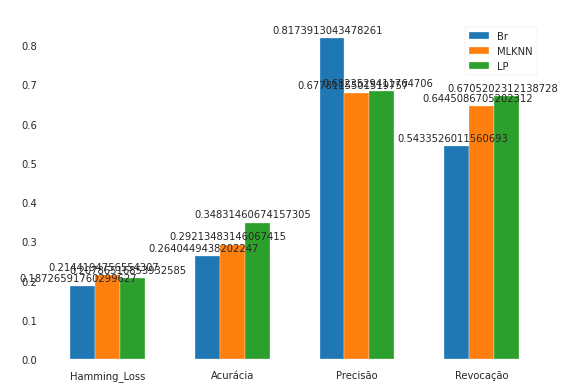

In [95]:
labels = ['Hamming_Loss', 'Acurácia', 'Precisão', 'Revocação']
Emotions_br = [BR_Hamming_Loss_Emotions, BR_Acuracia_Emotions, BR_Precisão_Emotions, BR_Revocação_Emotions]
Emotions_MLkNN = [MLkNN_Hamming_Loss_Emotions, MLkNN_Acuracia_Emotions, MLkNN_Precisão_Emotions, MLkNN_Revocação_Emotions]
Emotions_LP = [LP_Hamming_Loss_Emotions, LP_Acuracia_Emotions, LP_Precisão_Emotions, LP_Revocação_Emotions]

x = np.arange(len(labels))  # the label locations
width = 0.60  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, Emotions_br, width/3, label='Br')
rects2 = ax.bar(x, Emotions_MLkNN, width/3, label='MLKNN')
rects3 = ax.bar(x + width/3, Emotions_LP, width/3, label='LP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(' ')
ax.set_title(' ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()